In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats   #импортируем библиотеки

#### Датасет содержит информацию о клиентах банка и состоит из следующих переменных:
• **Age** - Возраст клиента                                                                                                   
• **Job** - Тип занятости                                                                                                    
• **Marital** - Семейное положение                                                                                             
• **Education** - Уровень образования                                                                                           
• **Default** - Наличие дефолта по кредиту (дефолт - неспособность должника погасить кредит)                                   
• **Balance** - Среднегодовой баланс банковской карты, в евро                                                                   
• **Housing** - Наличие ипотеки                                                                                                
• **Loan** - Наличие потребительского кредита                                                                                   
• **Contact** - Контактный вид связи                                                                                           
• **Day** - День последнего контакта                                                                                           
• **Month** - Месяц последнего контакта                                                                                         
• **Duration** - Продолжительность последнего контакта, в секундах                                                             
• **Campaign** - Количество контактов с клиентом за отчетный период                                                             
• **Y** - Наличие срочного банковского вклада (депозита)                                                                       

#### Цель анализа представленного датасета:
определить какие атрибуты оказывают влияние на открытие клиентами банка срочных банковских вкладов (депозитов)

In [2]:
df = pd.read_csv('C:\dataset/deposit2020.csv')   #загружаем выбранный датасет
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
df.info()   #вызываем метод info для того, чтобы узнать содержит ли наш датасет пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df.shape  #узнаем размерность нашего датасета

(40000, 14)

Вызвав функцию shape мы узнали, что наш датасет содержит 40 000 строк. Вызвав функцию info мы узнали, что каждый из имеющихся столбцов содержит 40 000 ненулевых значений. Это значит, что в нашем датасете нет пропущенных значений. Соответственно, работа с пропущенными значениями проводиться не будет.

In [5]:
df['job'].unique()   #узнаем какие типы занятости включены в наш датасет

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<AxesSubplot:>

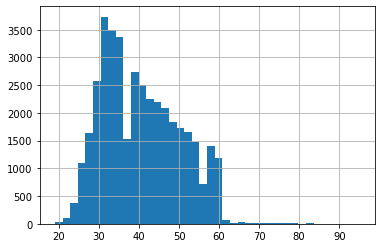

In [6]:
df['age'].hist(bins=40)   #построим гистограмму для того, чтобы посмотреть на распределение клиентов банка по возрасту

In [7]:
df['age'].mode()   #расчет моды

0    32
Name: age, dtype: int64

In [8]:
df['age'].median()   #расчет медианы

39.0

In [9]:
df['age'].mean()   #расчет среднего арифметического

40.5446

На графике распределения видно, что наиболее часто встречающееся значение возраста покупателей беговых дорожек находится в пределах 31-32 лет. Мы подтвердили это, выполнив расчет моды - 32 года. Посчитали и другие меры центральной тенденции - медиану и среднее арифметическое. 

In [10]:
df_age = pd.DataFrame(df.groupby('age')['balance'].mean())  #с помощью группировки выделим нужные нам данные в отдельный датасет

<AxesSubplot:xlabel='age'>

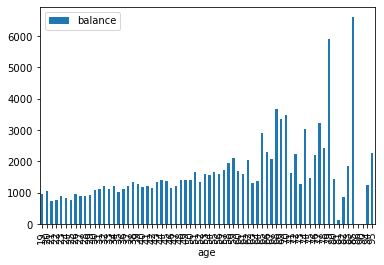

In [11]:
df_age.plot(kind='bar') #построим гистограмму распределения среднегодового баланса банковской карты по возрасту

In [12]:
df_age['balance'].max() - df_age['balance'].min()   #размах

6608.333333333333

In [13]:
np.percentile(df_age['balance'],75) - np.percentile(df_age['balance'],25)   #интерквартильный размах

710.4712642234647

In [14]:
print(df_age['balance'].var())   #дисперсия выборки
print(df_age['balance'].std())   #среднеквадратическое отклонениевыборки

1174716.5243916234
1083.843403998762


По графику распределения среднегодового баланса банковской карты по возрасту мы не можем однозначно что-то сказать, разве что об очевидных экстремальных значениях в преклонном возрасте. Также мы посчитали меры разброса (вариативности) для дохода.

#### Вопрос: Отличается ли среднегодовой баланс банковской карты клиентов в зависимости от наличия депозита?

Для того, чтобы ответить на этот вопрос используем **группировку данных в pandas**.

In [15]:
df.groupby('y')['balance'].mean()   #рассчитаем среднегодовой баланс банковской карты в зависимости от наличия депозита

y
no     1249.752533
yes    1588.495856
Name: balance, dtype: float64

**Вывод**: Среднегодовой баланс банковской карты клиентов, не имеющих открытый депозит в банке, в среднем ниже, чем у клиентов, имеющих открытый депозит.

#### Вопрос: Правда ли, что продолжительность контакта с клиентом, имеющим депозит в банке, в среднем выше, чем с клиентом, не открывшим депозит?

Для того, чтобы ответить на этот вопрос используем **Z-оценку**.

In [16]:
needed_columns = ['y','duration']   #выделяем нужные колонки в датасете и записываем их в отдельный датасет
df_z = df[needed_columns]
df_z.head()

,y,duration
0,no,261
1,no,151
2,no,76
3,no,92
4,no,198


In [17]:
df_z['z-score'] = scipy.stats.zscore(df_z['duration'])   #рассчитываем z-оценку и добавляем эту колонку в созданный датасет
df_z.head()

C:\Users\alina\AppData\Local\Temp\ipykernel_42392\3606419916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['z-score'] = scipy.stats.zscore(df_z['duration'])   #рассчитываем z-оценку и добавляем эту колонку в созданный датасет


,y,duration,z-score
0,no,261,0.023811
1,no,151,-0.400305
2,no,76,-0.689474
3,no,92,-0.627785
4,no,198,-0.219092


<AxesSubplot:>

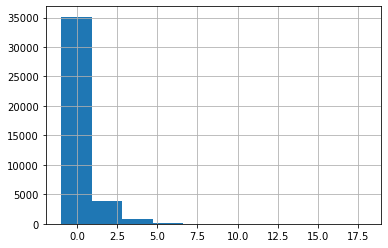

In [18]:
df_z['z-score'].hist()    #посмотрим на распределение z-оценки

In [19]:
df_z[df_z['z-score'] > 2]   #есть ли клиенты, контакт с которыми длился на 2 стандартных отклонения дольше среднего?

,y,duration,z-score
37,no,1666,5.440924
43,no,1492,4.770050
53,no,787,2.051855
59,no,1778,5.872751
61,no,812,2.148245
...,...,...,...
39788,yes,781,2.028721
39820,yes,1087,3.208534
39823,yes,1144,3.428303
39925,yes,924,2.580071


In [20]:
df_z.groupby('y')['z-score'].mean()   #смотрим на среднюю z-оценку для каждой из групп клиентов исходя из наличия депозита

y
no    -0.128840
yes    1.650713
Name: z-score, dtype: float64

**Вывод**: Это правда. В среднем клиенты, имеющие открытый депозит, дольше общаются с представителем банка при контакте. Можно предположить что клиенты банка, которые до сих пор не открыли депозит, знают о такой возможности, но не заинтересованы в нем. В связи с этим они не готовы долго общаться с представителем банка о %-ной ставке, возможности пополнения и других характеристиках предлагаемого депозита.

#### Вопрос: Содержат ли наши данные экстремальные значения по параметру среднегодового баланса банковской карты? Если да, то есть ли схожие характеристики у клиентов, на которые они приходятся?

Для того, чтобы ответить на этот вопрос используем **нахождение выбросов через интервартильный размах**.

In [21]:
df['balance'].describe()   #вызываем описательную статистику для параметра, по которому будем искать выбросы

count     40000.000000
mean       1274.277550
std        2903.769716
min       -8019.000000
25%          54.000000
50%         407.000000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64

In [22]:
q3 = np.percentile(df['balance'], 75)   #cохраним значения 1-ого и 3-ого перцентилей в переменные
q1 = np.percentile(df['balance'], 25)
print (q3, q1)

1319.0 54.0


In [23]:
iqr = q3 - q1   #найдем интерквартильный размах
print(iqr)

1265.0


In [24]:
iqr_threshold_bottom = q1 - 2.5 * iqr   #найдем нижнюю и верхнюю границы, для того чтобы понять что мы будем считать за выбросы
iqr_threshold_top = q3 + 2.5 * iqr
print (iqr_threshold_bottom, iqr_threshold_top)

-3108.5 4481.5


В распределении переменной среднегодового баланса банковской карты будут выбросы и слева и справа от медианы, так как нижняя граница не меньше минимального значения исследуемого параметра, а верхняя - не превышает максимального значения.

In [25]:
df[df['balance'] < iqr_threshold_bottom].shape   #найдем кол-во выбросов слева от медианы - 5

(5, 14)

In [26]:
df[df['balance'] > iqr_threshold_top].shape   #найдем кол-во выбросов справа от медианы - 2756

(2756, 14)

In [27]:
df[df['balance'] > iqr_threshold_top]['job'].value_counts()   #проверим на какой тип занятости клиента приходятся выбросы справа

management       804
blue-collar      510
technician       462
services         214
admin            204
self-employed    124
retired          117
entrepreneur     108
unemployed        89
housemaid         72
student           33
unknown           19
Name: job, dtype: int64

**Вывод**: Данные содержат экстремальные значения по параметру среднегодового баланса банковской карты, они находятся слева и справа от медианы. Однако, слева экстремальных значений всего 5, исследовать характеристики таких клиентов нет необходимости. Справа наблюдается большое количество выбросов, здесь мы можем исследовать интересные нам характеристики клиентов. Например, мы узнали, что такие клиенты преимущественно занимают менеджерские должности на работе (что логично, так как управляющие позиции подразумевают заработную плату выше средней).

#### Вопрос: Есть ли зависимость между переменными (age и balance) и (duration и campaign)?

Для того, чтобы ответить на этот вопрос будем искать **корреляцию** между переменными.

In [28]:
chisl_columns = ['age', 'balance','duration','campaign']   #возьмем только количественные переменные датасета
df_chisl = df[chisl_columns]   #и создадим новый датасет
df_chisl.head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


In [29]:
df_chisl.corr()   #применим функцию corr к новому датасету

,age,balance,duration,campaign
age,1.000000,0.081517,-0.036270,0.016204
balance,0.081517,1.000000,0.014072,-0.008137
duration,-0.036270,0.014072,1.000000,-0.088387
campaign,0.016204,-0.008137,-0.088387,1.000000


In [30]:
corr = df_chisl.corr()   # выведем коэф-ты корреляции в другом виде
corr.unstack().sort_values()  # отсортируем, чтобы найти самую слабую и самую сильную корреляции

duration  campaign   -0.088387
campaign  duration   -0.088387
age       duration   -0.036270
duration  age        -0.036270
balance   campaign   -0.008137
campaign  balance    -0.008137
balance   duration    0.014072
duration  balance     0.014072
age       campaign    0.016204
campaign  age         0.016204
age       balance     0.081517
balance   age         0.081517
age       age         1.000000
balance   balance     1.000000
duration  duration    1.000000
campaign  campaign    1.000000
dtype: float64

Кстати, удобно смотреть на связь между переменными через тепловую карту. Давайте нарисуем её.

In [31]:
import seaborn as sns   #импортируем нужную нам библиотек

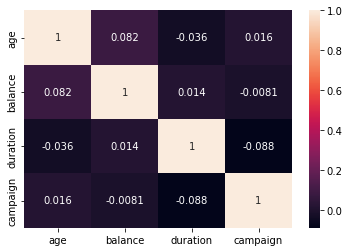

In [32]:
sns.heatmap(df_chisl.corr(), annot = True)   #выводим тепловую карту, параметром annot = True просим показать в ячейках числовые значения
plt.show()

<AxesSubplot:xlabel='duration', ylabel='campaign'>

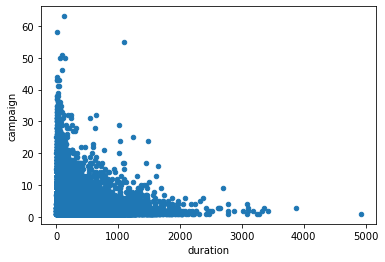

In [33]:
df.plot('duration','campaign',kind='scatter')   #строим график рассеяния для переменных duration и campaign

<AxesSubplot:xlabel='age', ylabel='balance'>

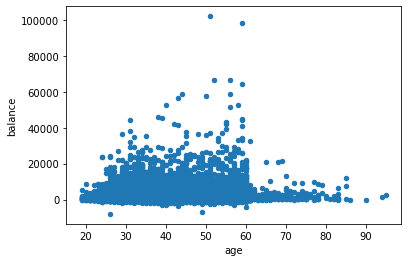

In [34]:
df.plot('age','balance',kind='scatter')   #строим график рассеяния для переменных age и balance

**Вывод**: Можно сказать, что между переменными duration и campaign наблюдается обратная связь, близкая к слабой (значение -0.08 близко к значению -0.1). А между переменными age и balance наблюдается прямая связь, близкая к слабой (значение 0.08 близко к значению 0.1). Переменные коррелируют крайне слабо, взаимосвязи практически нет.

#### Вопрос: Правда ли, что независимо от возраста, баланс банковской карты клиентов с открытым депозитом в среднем выше, чем у клиентов, не имеющих депозит?

Для того, чтобы ответить на этот вопрос будет удобно **визуализировать** наши переменные. Используем следующие переменные - наличие депозита, возраст, среднее баланс банковской карты за год.

In [35]:
sost = df.groupby(['y','age'])['balance'].mean()   #с помощью группировки создадим нужный нам набор данных
sost

y    age
no   19     1062.700000
     20     1136.055556
     21      754.906250
     22      796.661290
     23      892.856061
               ...     
yes  79     8304.000000
     83      571.500000
     85     6608.333333
     90        1.000000
     95     2282.000000
Name: balance, Length: 132, dtype: float64

Text(0.5, 0.98, 'Средний баланс банковской карты за год в завимости от возраста при наличии/отсутствии депозита')

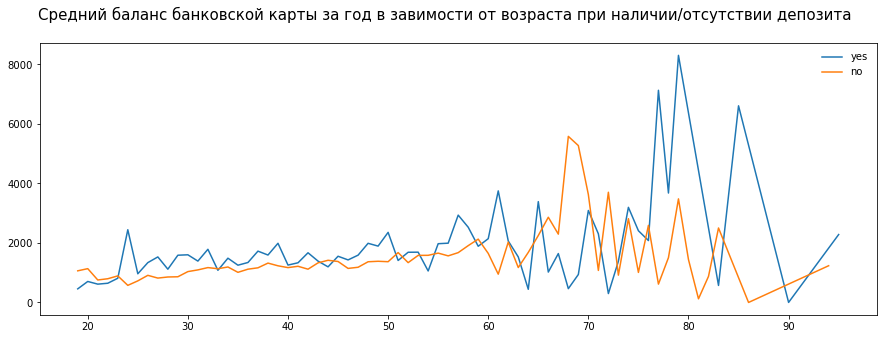

In [36]:
fig, ax = plt.subplots(figsize=(15,5))   #строим линейный график
ax.plot(sost.loc['yes'])
ax.plot(sost.loc['no'])
ax.legend(['yes','no'], frameon=False)
fig.suptitle('Средний баланс банковской карты за год в завимости от возраста при наличии/отсутствии депозита',fontsize=15)

**Вывод**: По большей части клиенты с открытым депозитом имеют средний баланс банковской карты выше, чем клиенты, у которых нет депозита. Однако, на графике можно заметить интересный момент - в промежутке примерно между 65 и 70 это не так. Для нас, как для маркетологов, это потрясающее окно возможностей!. Если мы создадим правильную коммуникацию о депозите как о продукте и донесем ее до наших клиентов 65-70 лет, то имеем большие шансы привлечь их средства в наш банк, так как их накопления уже сформировались до выхода на пенсию, а что с ними делать - клиенты еще не решили.

#### Вопрос: Правда ли, что в среднем наиболее длительный контакт с клиентом происходит при одинаковом количестве "касаний" клиента, независимо от наличия или отсутствия депозита?

Для того, чтобы ответить на этот вопрос будет удобно **визуализировать** наши переменные. Используем следующие переменные - наличие депозита, количество контактов с клиентом за период, средняя продолжительность последнего контакта (в секундах). Попробуем построить два отдельных графика - для клиентов, не имеющих депозит, и для клиентов с открытым депозитом.

In [37]:
average_duration = df.groupby(['y','campaign'])['duration'].mean()
average_duration

y    campaign
no   1            226.685595
     2            239.837583
     3            231.047640
     4            213.186016
     5            193.562379
                    ...     
yes  20           209.000000
     21           253.000000
     24          1484.000000
     29          1013.000000
     32           651.000000
Name: duration, Length: 70, dtype: float64

In [38]:
df['duration'].describe()

count    40000.000000
mean       254.824300
std        259.366498
min          0.000000
25%        100.000000
50%        175.000000
75%        313.000000
max       4918.000000
Name: duration, dtype: float64

Text(0.5, 0.98, 'Средняя продолжительность контакта в зависимости от числа "касаний" с клиентом, не имеющим депозит, и с клиентом с открытым депозитом')

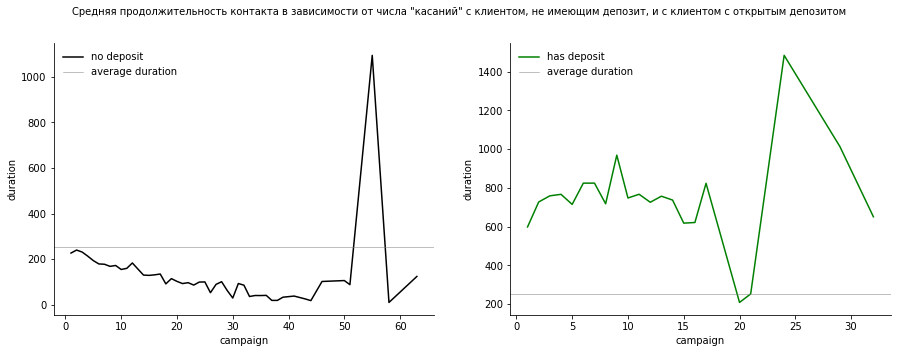

In [39]:
fig, ax = plt.subplots(1,2, figsize=(15,5))   #строим линейные графики - отдельно для выделенных категорий клиентов
ax[0].plot(average_duration.loc['no'], c='black')
ax[1].plot(average_duration.loc['yes'], c='green')

for axis in ax.ravel():
    axis.set_xlabel('campaign')
    axis.set_ylabel('duration')
    axis.axhline(254.8, c='grey', lw=0.5)  #среднее значение = 254.8 сек узнали с помощью функции describe
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0].legend(['no deposit','average duration'], frameon=False)
ax[1].legend(['has deposit','average duration'], frameon=False)

fig.suptitle('Средняя продолжительность контакта в зависимости от числа "касаний" с клиентом, не имеющим депозит, и с клиентом с открытым депозитом',fontsize=10)

**Вывод**: Неправда. В среднем наиболее длительный контакт с клиентами разных категорий происходит при разном количестве касаний. Для клиентов, не имеющих депозит, наибольшая длительность наблюдается при примерно 55 "касаниях" за период. А для клиентов с открытым депозитом - при 25 "касаниях". Наша цель как маркетологов - привлечь средства клиентов через депозиты, для этого мы должны увеличивать количество "касаний" через другие услуги банка, добиться лояльности клиента, после чего он с большей готовностью будет обсуждать возможность открытия депозита и его условия.

#### Проверим гипотезу: Нет разницы между среднегодовым балансом клиентов, испытавших дефолт, и клиентов, не испытавших дефолт.

Для того, чтобы ответить на этот вопрос будем использовать **t-тест для тестирования гипотез**.

H0: Нет разницы между среднегодовым балансом клиентов, испытавших дефолт, и клиентов, не испытавших дефолт.

H1: Есть разница между среднегодовым балансом клиентов, испытавших дефолт, и клиентов, не испытавших дефолт.

Будем использовать двусторонний тест. Уровень статистической значимости альфа = 0.05

In [40]:
default_yes = df[df['default'] == 'yes']['balance']   #получаем два объекта pandas series
default_no = df[df['default'] == 'no']['balance']

In [41]:
print(default_yes.var())   #рассчитываем дисперсии - они не равны
print(default_no.var())

822700.635355345
8546723.154216561


In [42]:
scipy.stats.ttest_ind(default_yes, default_no, equal_var=False)   #используем функцию из библиотеки scipy.stats

Ttest_indResult(statistic=-41.128427677926695, pvalue=8.229628795575887e-231)

In [43]:
p_value = scipy.stats.ttest_ind(default_yes, default_no, equal_var=False)[-1]   #расчитываем pvalue

In [44]:
def hypothesis_check(p_value, t_critical):   #задаем функцию для проверки гипотезы
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667   #определяем критическое значение t

In [45]:
hypothesis_check(p_value, t_critical)   #используем функцию для проверки гипотезы

Отвергаем Н0. Разница между средними статистически значима.


**Вывод**: Гипотеза о том, что нет разницы между среднегодовым балансом клиентов, испытавших дефолт, и клиентов, не испытавших дефолт, отвергается.